
# ORE Jupyter Dashboard

This dashboard contains several modules to run ORE functionality and visualize results.

It assumes a standard installation of Anaconda Python 3, see https://www.continuum.io/downloads. 

Some plots require more dependencies, see below.

## Launch ORE

Kick off a process in ORE as specified in Input/ore.xml

In [1]:
from OREAnalytics import *

print ("Loading parameters...")
params = Parameters()
print ("   params is of type", type(params))
params.fromFile("Input/ore.xml")
print ("   setup/asofdate = " + params.get("setup","asofDate"))

print ("Building OREApp...")
ore = OREApp(params)
print ("   ore is of type", type(ore))

Loading parameters...
   params is of type <class 'OREAnalytics.Parameters'>
   setup/asofdate = 2016-02-05
Building OREApp...
   ore is of type <class 'OREAnalytics.OREApp'>


In [2]:
print ("Running ORE process...");
ore.buildMarket()
print ("ORE process finished");

Running ORE process...
Curve configuration...                            OK
Market data loader...                             OK
Market...                                         OK
ORE process finished


## Query ORE App Members

Retrieve the market object stored in OREApp and initialized in the previous step when running the ORE process.

Then query the market object for some members (a discount and a forward curve) and evaluate discount factors and zero rates at some point in time in the future.

In [3]:
print ("Retrieve market object...");
market = ore.getMarket()
print ("   retrieved market is of type", type(market))
asof = market.asofDate();
print ("   retrieved market's asof date is", asof)

Retrieve market object...
   retrieved market is of type <class 'OREAnalytics.MarketImpl'>
   retrieved market's asof date is February 5th, 2016


In [4]:
ccy = "EUR"
index = "EUR-EURIBOR-6M"

print ("Get term structures for ccy ", ccy, "and index", index);

discountCurve = market.discountCurve(ccy)
print ("   discount curve is of type", type(discountCurve))

iborIndex = market.iborIndex(index)
print ("   ibor index is of type", type(iborIndex))

forwardCurve = iborIndex.forwardingTermStructure()
print ("   forward curve is of type", type(forwardCurve))

date = asof + 10*Years;
zeroRateDc = Actual365Fixed()

discount = discountCurve.discount(date)
zero = discountCurve.zeroRate(date, zeroRateDc, Continuous)

fwdDiscount = forwardCurve.discount(date)
fwdZero = forwardCurve.zeroRate(date, zeroRateDc, Continuous)

print ("   10y discount factor (discount curve) is", discount)
print ("   10y discout factor (forward curve) is", fwdDiscount)

print ("   10y zero rate (discount curve) is", zero)
print ("   10y zero rate (forward curve) is", fwdZero)

Get term structures for ccy  EUR and index EUR-EURIBOR-6M
   discount curve is of type <class 'OREAnalytics.YieldTermStructureHandle'>
   ibor index is of type <class 'OREAnalytics.IborIndex'>
   forward curve is of type <class 'OREAnalytics.YieldTermStructureHandle'>
   10y discount factor (discount curve) is 1.0001383845613816
   10y discout factor (forward curve) is 0.9999795014847501
   10y zero rate (discount curve) is -0.168356 % Actual/365 (Fixed) continuous compounding
   10y zero rate (forward curve) is 0.024940 % Actual/365 (Fixed) continuous compounding


In [5]:
dc = Actual365Fixed()

# date grid
dates = []
times = []
zeros1 = []
zeros2 = []
date = asof
previousDate = asof
for i in range (1,10*53):
    date = date + Period(1, Weeks);
    time = dc.yearFraction(asof, date)
    dates.append(date)
    times.append(time)
    zero1 = discountCurve.forwardRate(previousDate, date, zeroRateDc, Continuous).rate()
    zero2 = forwardCurve.forwardRate(previousDate, date, zeroRateDc, Continuous).rate()
    zeros1.append(zero1)
    zeros2.append(zero2)
    previousDate = date
    #print (date, time, zero1, zero2)

#print(times)

## Curve Plot

Install matplotlib and numpy with 'pip install matplotlib'.
Then plot the discount and forward curves above, as follows.

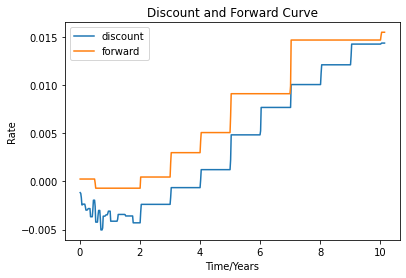

In [6]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(times, zeros1, label='discount')
plt.plot(times, zeros2, label='forward')
plt.xlabel('Time/Years')
plt.ylabel('Rate')
plt.title('Discount and Forward Curve')
plt.legend()
plt.show()